# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

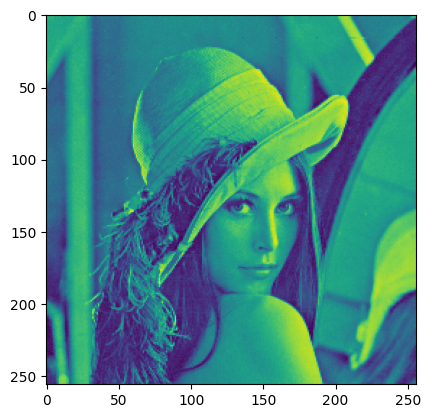

In [1]:
import numpy
import matplotlib.pyplot as plt
Lena = plt.imread("data/lena.png")
plt.imshow(Lena)

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [8]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        count = 0
        for q in numpy.ndindex(size, size):
            x = p[0]-n+q[0]
            y = p[1]-n+q[1]
            if 0 <= x < img.shape[0] and 0 <= y < img.shape[1]:
                count += 1
                neighborhood_sum += img[x,y]
        if count == size**2:
            result[p] = neighborhood_sum/size**2
        else: result[p] = 0
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

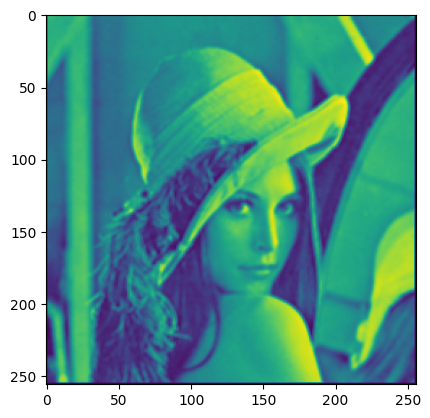

In [9]:
plt.imshow(meanfilter(Lena,3))

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [15]:
#plt.imshow(plt.imread("data/lena_meanfilter5.png"))
assert numpy.allclose(meanfilter(Lena,5), plt.imread("data/lena_meanfilter5.png"), atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [22]:
def medianfilter(img, size):
    n = (size - 1) // 2
    result = numpy.zeros(img.shape)
    for p in numpy.ndindex(img.shape):
        liste = []
        count = 0
        for q in numpy.ndindex(size,size):
            x = p[0]-n+q[0]
            y = p[1]-n+q[1]
            if 0 <= x < img.shape[0] and 0 <= y < img.shape[1]:
                count+=1
                liste.append(img[x,y])
        if count == size ** 2:
            result[p] = sorted(liste)[(size**2 - 1) // 2]
        else:
            result[p] = 0
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

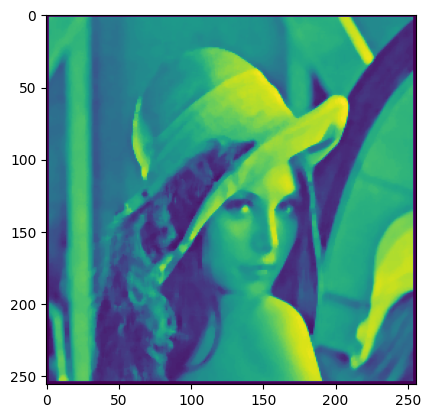

In [23]:
plt.imshow(medianfilter(Lena,5))

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [ ]:
assert numpy.allclose(medianfilter(Lena,5), plt.imread("data/lena_medianfilter5.png"), atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: